In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(os.path)
myFiles = os.listdir(MYDIR)
print(myFiles)

print("Done")

<module 'ntpath' from 'C:\\Users\\alexg\\Anaconda3\\lib\\ntpath.py'>
['Education.xls', 'table-1-1.xlsx', 'table-3.xlsx']
Done


In [13]:
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers()

In [18]:
# MYDIR = "./../../ResearchProposal/education/"

myDFRaw = pd.read_excel(MYDIR + "education/Education.xls", skiprows=4,
                        sheet_name="Education 1970 to 2018",
                       )
myDFRaw.head()
myDFRaw.rename(columns={"State": "st"}, inplace=True)
myDF = myDFRaw.merge(helpers.mStateAbbreviationsDF)

del myDF["st"]
myDF.head()

,FIPS Code,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970",...,"Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",state
0,1000,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,141936.0,...,19.0,470043.0,1020172.0,987148.0,822595.0,14.2,30.9,29.9,24.9,Alabama
1,1001,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,767.0,...,18.0,4204.0,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7,Alabama
2,1003,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,2038.0,...,23.1,14310.0,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3,Alabama
3,1005,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,861.0,...,10.9,4901.0,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2,Alabama
4,1007,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,302.0,...,7.1,2650.0,7471.0,3846.0,1813.0,16.8,47.3,24.4,11.5,Alabama


In [20]:
statesAndCountry = myDF.loc[~myDF["Area name"].str.contains("County")].copy().reset_index(drop=True, inplace=False)
statesAndCountry.head()

,FIPS Code,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970",...,"Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",state
0,1000,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,141936.0,...,19.0,470043.0,1020172.0,987148.0,822595.0,14.2,30.9,29.9,24.9,Alabama
1,2000,Alaska,NaN,NaN,NaN,NaN,44994.0,50820.0,20052.0,19082.0,...,24.7,34760.0,133851.0,169471.0,139645.0,7.3,28.0,35.5,29.2,Alaska
2,2010,Aleutian Islands,NaN,NaN,NaN,NaN,1237.0,1112.0,380.0,390.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alaska
3,2013,Aleutians East Borough,9.0,12.0,9.0,12.0,NaN,NaN,NaN,NaN,...,4.9,358.0,1061.0,882.0,336.0,13.6,40.2,33.4,12.7,Alaska
4,2016,Aleutians West Census Area,7.0,11.0,9.0,11.0,NaN,NaN,NaN,NaN,...,11.0,459.0,1664.0,1309.0,675.0,11.2,40.5,31.9,16.4,Alaska


In [21]:
counties = myDF.loc[myDF["Area name"].str.contains("County")].copy().reset_index(drop=True, inplace=False)
counties.head()

counties["county"] = counties["Area name"].str.replace(" County", "")
del counties["Area name"]
counties["county_state"] = counties["county"] + ", " + counties["state"]
counties.head()

,FIPS Code,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970",...,"High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",state,county,county_state
0,1001,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,767.0,54.8,...,12119.0,10552.0,10291.0,11.3,32.6,28.4,27.7,Alabama,Autauga,"Autauga, Alabama"
1,1003,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,2038.0,59.4,...,40579.0,46025.0,46075.0,9.7,27.6,31.3,31.3,Alabama,Baldwin,"Baldwin, Alabama"
2,1005,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,861.0,68.8,...,6486.0,4566.0,2220.0,27.0,35.7,25.1,12.2,Alabama,Barbour,"Barbour, Alabama"
3,1007,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,302.0,73.1,...,7471.0,3846.0,1813.0,16.8,47.3,24.4,11.5,Alabama,Bibb,"Bibb, Alabama"
4,1009,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,404.0,70.5,...,13489.0,13267.0,5010.0,19.8,34.0,33.5,12.6,Alabama,Blount,"Blount, Alabama"


In [2]:
def setGender(dfEd: pd.DataFrame) -> pd.DataFrame:
    """
    get gender into a separate column
    """
    dfEd["gender"] = ""

    gender = dfEd[dfEd.Total.isnull()]
    print(list(gender.index))

    dfEd.at[gender.index, "gender"] = dfEd.loc[gender.index]["category"]
    for rr in range (1, len(dfEd)):
        if rr in list(gender.index):
            continue
        else:
            dfEd.at[rr, "gender"] = dfEd.loc[rr-1, "gender"]

    return dfEd

def getAndPrepData(myFile: str, cols) -> pd.DataFrame:
    dfEd = pd.read_excel(myFile, sheet_name='Sheet1')
    dfEd.columns = cols

    num_rows = len(dfEd)
    print(num_rows)

    dfEd.drop(range(3), inplace=True)

    footnotes_start = [rr for rr in range(len(dfEd)) if list(dfEd.category)[rr] == "Footnotes:"]
    if len(footnotes_start) > 0:
        print(f"""dropping {range(footnotes_start[0], num_rows)}""")
        dfEd.drop(dfEd.index[footnotes_start[0]:num_rows], inplace=True)

    dfEd.dropna(axis=0, subset=["category"], inplace=True)

    dfEd.reset_index(drop=True, inplace=True)
    dfEd = setGender(dfEd)

    dfEd.dropna(axis=0, subset=["Total"], inplace=True)
    dfEd.drop(0, inplace=True)
    del dfEd["Total"]
    dfEd.reset_index(drop=True, inplace=True)
    
    for cc in dfEd.columns:
        if cc in ["category", "gender"]:
            continue
        dfEd[cc] = dfEd[cc] * 1000
    
    return dfEd

def plotData(myEd: pd.DataFrame):
    for gg in myEd.gender.unique():
        print(gg)
        ggEd = myEd.loc[dfEd.gender == gg].copy()
        ggEd.reset_index(drop=True, inplace=True)
        ax = ggEd.plot(x="category", lw=2.0, figsize=(15, 8))
        ax.set_title(gg, fontsize=14)
        ax.set_xticks(ggEd.index)
        ax.set_xticklabels(list(ggEd.category), rotation=45, fontsize=14)
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, 
                                                             loc: 
                                                             "{:,}".format(int(x))))
    
        plt.yticks(fontsize=14)
        plt.legend(fontsize=14)
        plt.show()

In [10]:
myFile = MYDIR + myFiles[0]
cols = ["category", "Total", "None", 
        "1st - 4th grade", "5th - 6th grade", 
        "7th - 8th grade", 
        "9th grade", 
        "10th grade", 
        "11th grade2", 
        "High school graduate", 
        "Some college, no degree", 
        "Associate's degree, occupational", 
        "Associate's degree, academic", 
        "Bachelor's degree", "Master's degree", 
        "Professional degree", "Doctoral degree"]

dfEd = getAndPrepData(myFile, cols)
list(dfEd.category.unique())

57
dropping range(47, 57)
[1, 16, 31]


['.18 years and over',
 '..18 to 24 years',
 '.25 years and over',
 '..25 to 29 years',
 '..30 to 34 years',
 '..35 to 39 years',
 '..40 to 44 years',
 '..45 to 49 years',
 '..50 to 54 years',
 '..55 to 59 years',
 '..60 to 64 years',
 '..65 to 69 years',
 '..70 to 74 years',
 '..75 years and over']

In [4]:
dfEd4Plotting = dfEd.loc[~dfEd.category.str.contains("over")].copy()
dfEd4Plotting.category.unique()

array(['..18 to 24 years', '..25 to 29 years', '..30 to 34 years',
       '..35 to 39 years', '..40 to 44 years', '..45 to 49 years',
       '..50 to 54 years', '..55 to 59 years', '..60 to 64 years',
       '..65 to 69 years', '..70 to 74 years'], dtype=object)

Both Sexes


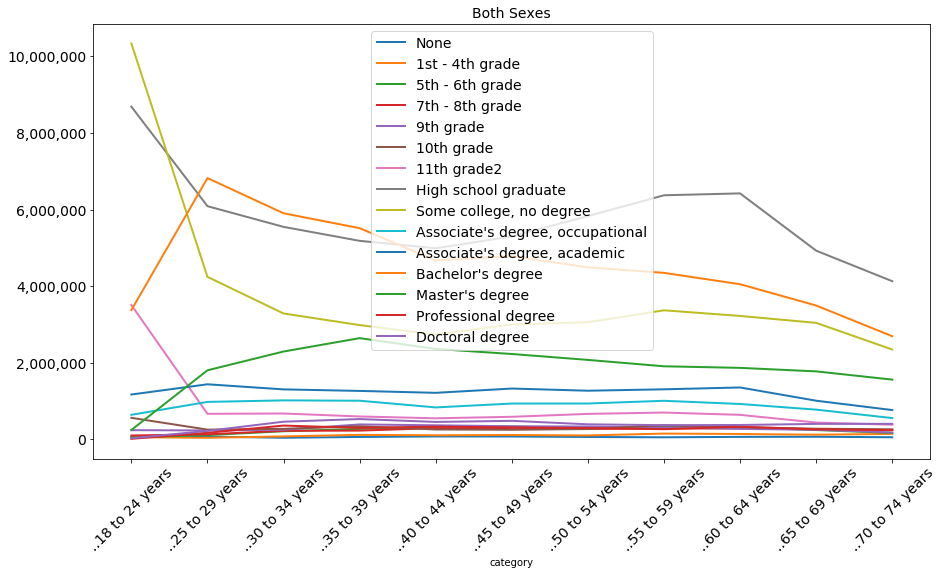

Male


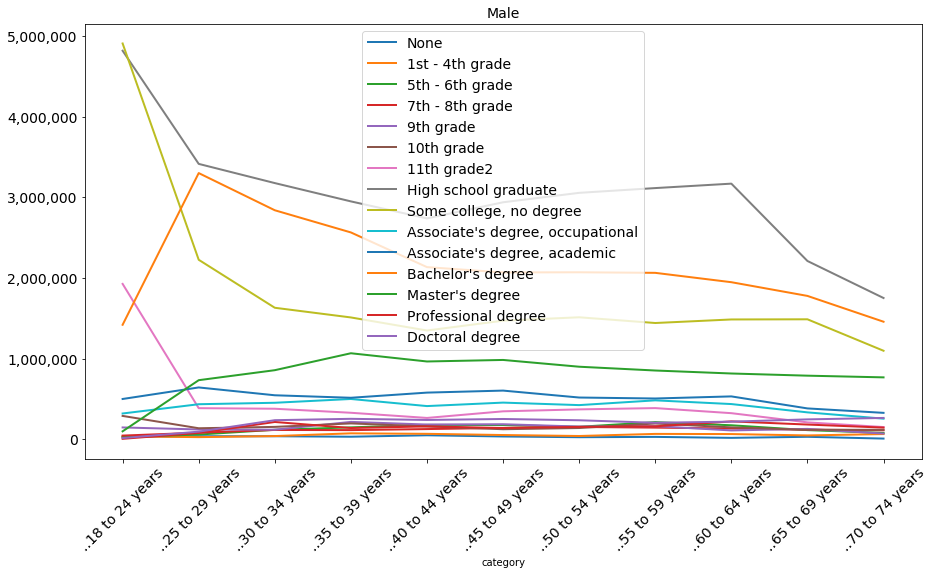

Female


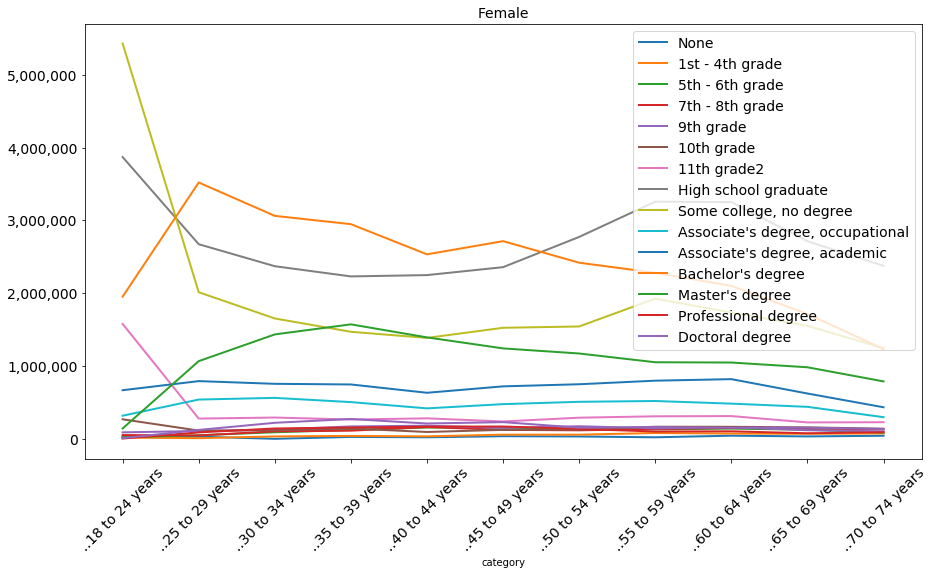

In [5]:
plotData(dfEd4Plotting)

School Education

Both Sexes


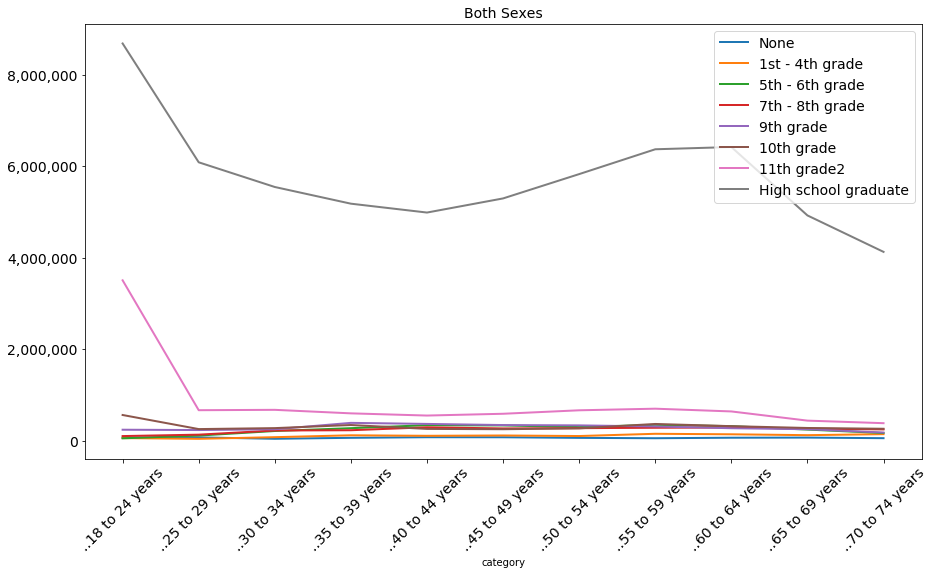

Male


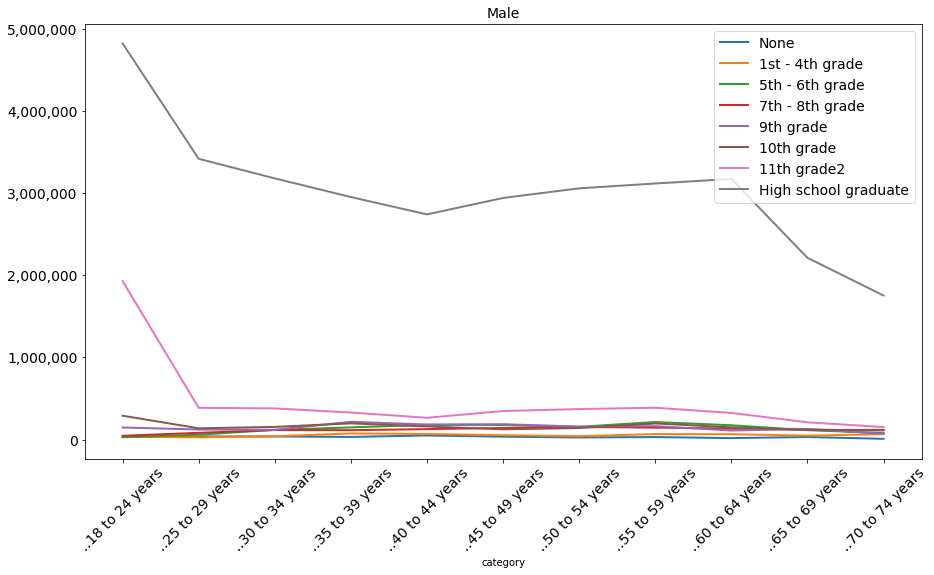

Female


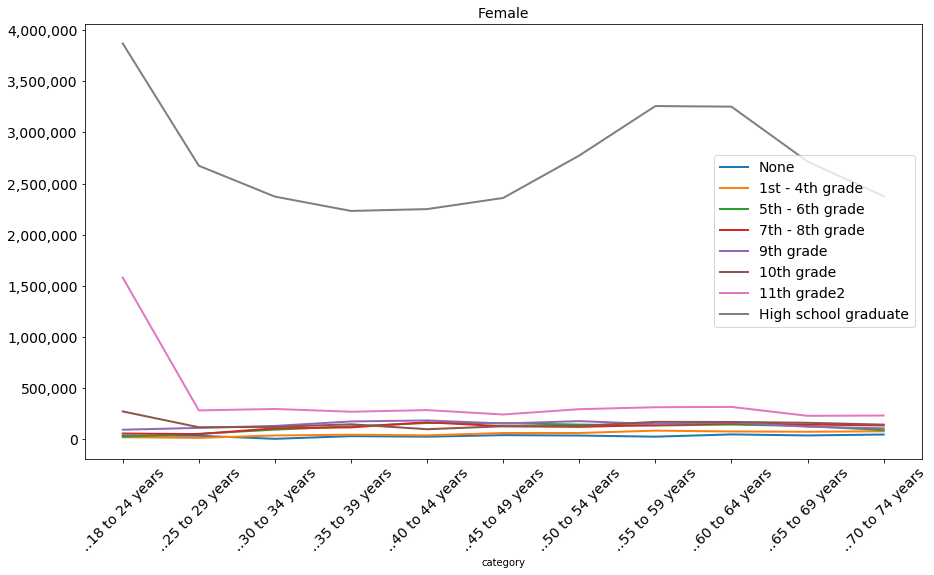

In [9]:
print("School Education\n")
schoolEd = dfEd4Plotting[["category",
                          "None",
                          "1st - 4th grade",
                          "5th - 6th grade",
                          "7th - 8th grade",
                          "9th grade",
                          "10th grade",
                          "11th grade2",
                          "High school graduate",
                          "gender",
                         ]]

plotData(schoolEd)

Higher Education

Both Sexes


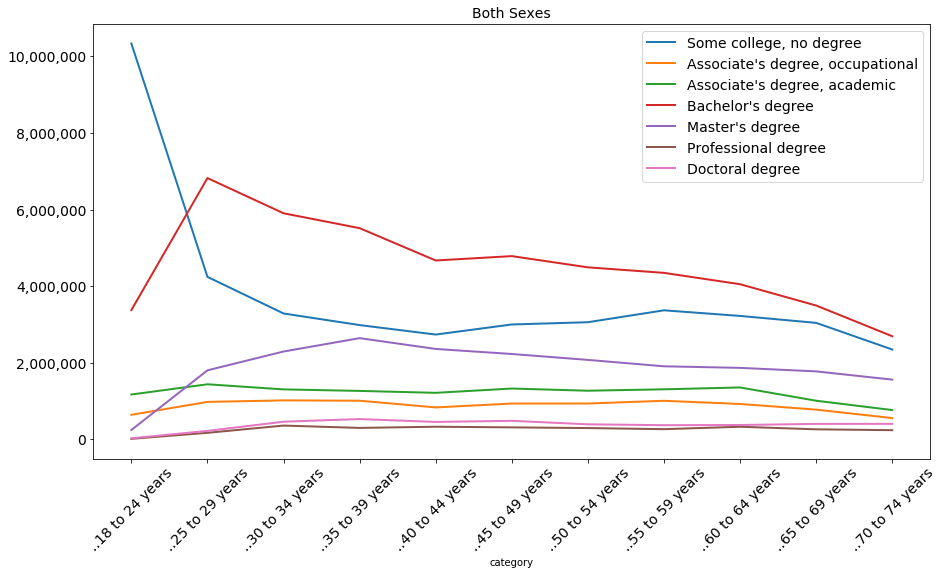

Male


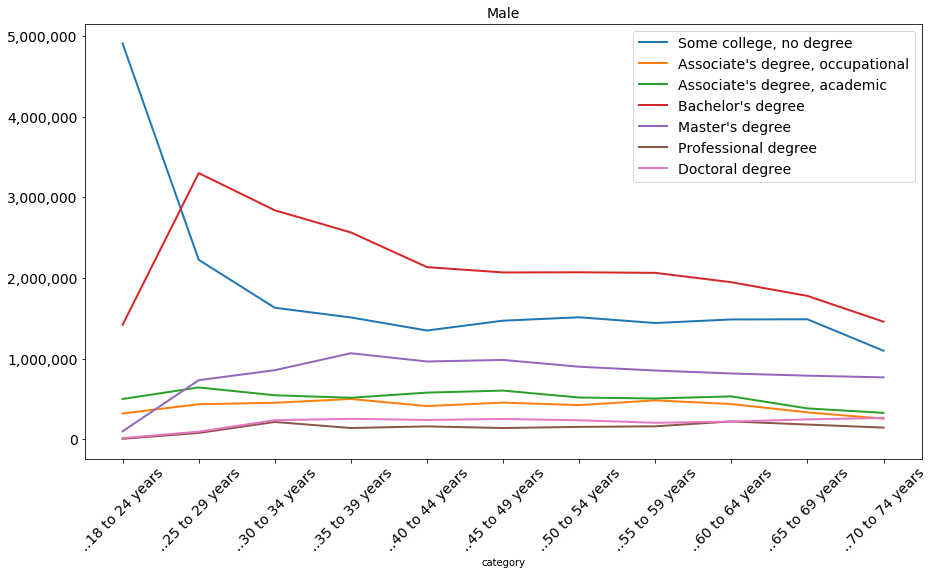

Female


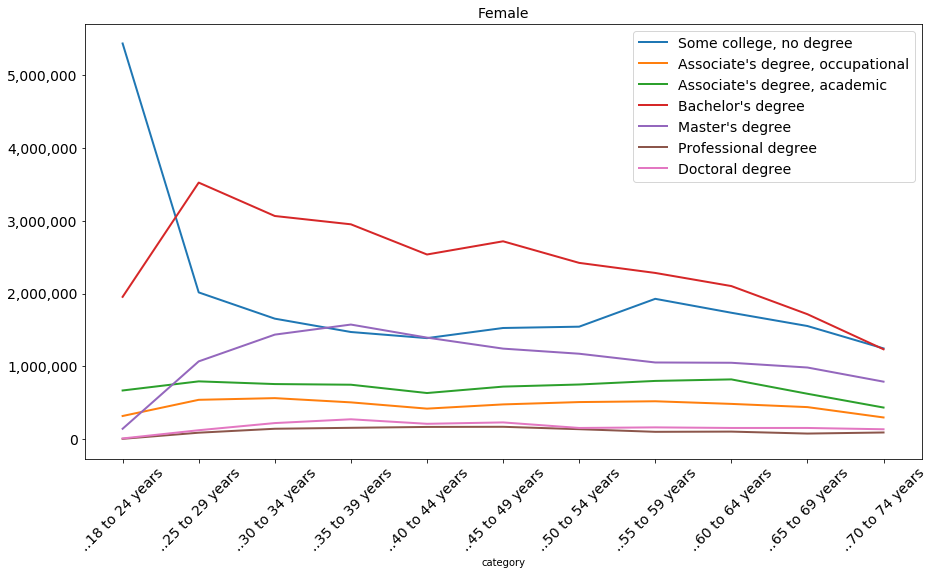

In [8]:
print("Higher Education\n")
higherEd = dfEd4Plotting[["category", "Some college, no degree",
                          "Associate's degree, occupational",
                          "Associate's degree, academic",
                          "Bachelor's degree", "Master's degree",
                          "Professional degree", "Doctoral degree",
                          "gender",
                         ]]

plotData(higherEd)